<h1 align="center">Trabalho 1 - Sudoku</h1>
<h3 align="center">Outubro, 2021</h3>

Inês Pires Presa - A90355  
Tiago dos Santos Silva Peixoto Carriço - A91695


## Variáveis:

### *Inputs* do Problema

- $N$ - dimensão do *Sudoku*

- $a$ - fração das casas do *Sudoku* que devem estar preeenchidas inicialmente

### Auxiliares

- $matriz_{i,j,c}$ - representa a atribuição de um número $c$ à casa $(i,j)$ do *Sudoku* (usada para definir as variáveis do *Solver*)

- $mat_{i,j,c}$ - representa a atribuição de um número $c$ à casa $(i,j)$ do *Sudoku* (usada para guardar a solução)

Onde $i,j,c \in [0..N^2-1]$

## Condições:

1. Não alterar números que já estejam atribuídos
1. Garantir que todas as casas têm número
1. Casas na mesma linha não podem ter números repetidos
1. Casas na mesma coluna não podem ter números repetidos
1. Casas no mesmo quadrado não podem ter números repetidos

In [ ]:
!pip install ortools
!pip install matploitlib

ERROR: Could not find a version that satisfies the requirement matploitlib (from versions: none)
ERROR: No matching distribution found for matploitlib


In [ ]:
from ortools.linear_solver import pywraplp
import networkx as nx
import random
import timeit
import matplotlib.pyplot as plt
from tabulate import tabulate

## Funções:

- `sudoku(mat, N)` - resolve um *Sudoku* de dimensão $N^2$

In [ ]:
def sudoku(mat, N):
  solver = pywraplp.Solver('BOP', pywraplp.Solver.BOP_INTEGER_PROGRAMMING)

  matriz = {}
  for i in range(N**2):
    matriz[i] = {}
    for j in range(N**2):
      matriz[i][j] = {}
      for c in range(N**2):
        matriz[i][j][c] = solver.BoolVar("matriz[%i][%i][%i]" % (i,j,c))

  #1. nao alterar numeros que ja estao atribuidos
  for x in range(N**2):
    for y in range(N**2):
      for c in range(N**2):
        if mat[y][x][c] == 1:
          solver.Add(matriz[y][x][c] == 1)


  #2. garantir que todos tem numero
  for x in range(N**2):
    for y in range(N**2):
      solver.Add(sum([matriz[y][x][c] for c in range(N**2)]) == 1)

  #3. ligar linhas
  for y in range(N**2):
    for c in range(N**2):
      solver.Add(sum([matriz[y][x][c] for x in range(N**2)]) <= 1)

  #4. ligar colunas
  for x in range(N**2):
    for c in range(N**2):
      solver.Add(sum([matriz[y][x][c] for y in range(N**2)]) <= 1)

  #5. ligar quadrados
  for limx in range(0,N**2,N):
    for limy in range(0,N**2,N):
      for c in range(N**2):
        solver.Add(sum([matriz[y][x][c] for x in range(limx, limx+N) for y in range(limy, limy+N)]) <= 1)

  r = solver.Solve()

  if r == pywraplp.Solver.OPTIMAL:
    for y in range(N**2):
      for x in range(N**2):
        for c in range(N**2):
          mat[y][x][c] = round(matriz[y][x][c].solution_value())


- `matriz_parcial(mat, N)` - preenche os quadrados que constituem a diagonal do *Sudoku*

In [ ]:
def matriz_parcial(mat, N):
  for limx in range(0,N**2,N):
    for limy in range(0,N**2,N):
      if limx == limy:
        lista = [x for x in range(N**2)]
        for x in range(limx, limx+N):
          for y in range(limy, limy+N):
            p = random.randint(0,len(lista)-1)
            num = lista.pop(p)
            mat[y][x][num] = 1

- `gerar_sudoku(mat, N, a)` - gera um *Sudoku* de dimensão $N^2$ com uma fração $a$ das casas preenchidas

In [ ]:
def gerar_sudoku(mat, N, a):

  for x in range(N**2):
    mat[x] = {}
    for y in range(N**2):
      mat[x][y] = {}
      for c in range(N**2):
        mat[x][y][c] = 0

  matriz_parcial(mat, N)
  sudoku(mat, N)

  remover = int((1-a)*(N**4))

  lista = [(x,y) for x in range(N**2) for y in range(N**2)]

  while remover != 0:
    num = random.randint(0,len(lista)-1)
    x,y = lista.pop(num)
    for c in range(N**2):
      mat[y][x][c] = 0
    remover -= 1

  return mat

- `print_sudoku(mat, N)` - imprime o *Sudoku*

In [ ]:
def print_sudoku(mat, N):
  
  for y in range(N**2):
    for x in range(N**2):
      colorido = False
      for c in range(N**2):
        if mat[y][x][c] == 1:
          colorido = True
          print(" ", end ="")
          print("%02d" % (c+1), end ="")
          if (x+1) % N == 0 and x != N**2-1:
            print(" |", end="")
          break
      if not colorido:
        print(" ", end ="")
        print("..", end ="")
        if (x+1) % N == 0 and x != N**2-1:
          print(" |", end="")

    print()
    if (y+1) % N == 0 and y != N**2-1:
      for k in range(N):
        for p in range((3*N)+1):
          print("-", end ="")
        if k != N-1:
          print("+", end ="")
        else:
          print("\n", end ="")

## Inicializar *Sudoku* a partir dos parâmetros $N$ e $a$:

In [ ]:
N = 6

a = 0.6

mat = {}

gerar_sudoku(mat, N,a)

print_sudoku(mat, N)

 10 02 13 22 24 06 | 08 33 .. .. 19 .. | 16 .. 07 .. .. 27 | .. .. .. .. .. 14 | 28 11 .. 05 .. .. | 23 .. .. .. 31 26
 .. 08 25 21 20 34 | 24 18 35 28 30 .. | 33 .. 04 .. .. 10 | 19 29 .. .. .. 26 | .. .. .. .. .. 01 | 11 .. .. 12 02 ..
 16 .. 07 .. 27 29 | 23 36 .. .. 11 .. | 12 .. 08 14 .. 24 | 17 30 05 04 .. .. | 02 .. .. 15 22 06 | 18 35 28 .. 34 21
 .. 15 28 .. 31 32 | 29 16 20 27 22 07 | 09 .. 25 21 35 02 | 10 23 .. 12 .. 11 | 30 .. 08 34 33 .. | .. .. .. 19 .. 01
 .. 11 .. .. .. .. | .. 03 10 .. .. 13 | 30 .. .. .. 06 15 | 36 31 16 02 .. .. | 29 .. 04 35 20 .. | 33 32 22 .. .. 25
 35 12 14 33 26 .. | .. 02 01 .. 34 05 | .. 22 13 .. 11 .. | .. 06 07 .. 18 28 | .. 16 17 25 27 21 | 24 36 .. 08 10 20
-------------------+-------------------+-------------------+-------------------+-------------------+-------------------
 08 10 20 15 .. .. | 32 01 .. 03 26 11 | 02 .. 21 .. .. .. | 30 35 28 23 .. 29 | .. .. 06 12 19 18 | 04 22 .. 14 25 34
 .. 16 .. .. 32 19 | 15 .. 09 22 .. 33 | 34 .. 

## Resolver *Sudoku*:

In [ ]:
sudoku(mat, N)
print_sudoku(mat, N)

 10 02 13 22 24 06 | 08 33 17 15 19 09 | 16 03 07 20 36 27 | 01 25 34 21 35 14 | 28 11 12 05 18 32 | 23 30 04 29 31 26
 36 08 25 21 20 34 | 24 18 35 28 30 06 | 33 17 04 23 05 10 | 19 29 22 32 15 26 | 07 03 14 13 31 01 | 11 09 16 12 02 27
 16 03 07 09 27 29 | 23 36 25 32 11 26 | 12 01 08 14 31 24 | 17 30 05 04 33 20 | 02 10 19 15 22 06 | 18 35 28 13 34 21
 04 15 28 17 31 32 | 29 16 20 27 22 07 | 09 18 25 21 35 02 | 10 23 13 12 24 11 | 30 36 08 34 33 26 | 06 03 14 19 05 01
 19 11 05 18 23 01 | 12 03 10 21 14 13 | 30 28 34 26 06 15 | 36 31 16 02 27 08 | 29 09 04 35 20 24 | 33 32 22 07 17 25
 35 12 14 33 26 30 | 04 02 01 31 34 05 | 29 22 13 32 11 19 | 03 06 07 09 18 28 | 23 16 17 25 27 21 | 24 36 15 08 10 20
-------------------+-------------------+-------------------+-------------------+-------------------+-------------------
 08 10 20 15 13 36 | 32 01 24 03 26 11 | 02 27 21 17 09 31 | 30 35 28 23 05 29 | 16 07 06 12 19 18 | 04 22 33 14 25 34
 17 16 03 23 32 19 | 15 29 09 22 04 33 | 34 26 

## Analisar complexidade:

In [ ]:
aLista = [0, 0.2, 0.4, 0.6]
tempos = {}

head = [str(a) for a in aLista]
head.insert(0, "N")

h = [[], [], []]

N = 3

tempos[N] = {}
y1 = []

mat = {}
h[0].insert(0, "3") 
for j in range(len(aLista)):
  a = aLista[j]
  tempos[N][a] = []
  for i in range(100):
    gerar_sudoku(mat, N, a)
    t = timeit.timeit(lambda: sudoku(mat, N), number=1)
    tempos[N][a].append(t)
  h[0].insert(j+1, "Med: " + str( sum(tempos[N][a])/100 ) + "\nMax: " 
              + str(max(tempos[N][a])) + "\nMin: " + str(min(tempos[N][a])) + "\n " )
  y1.append(sum(tempos[N][a])/100)


In [ ]:
N = 4

tempos[N] = {}
y2 = []

mat = {}
h[1].insert(0, "4") 
for j in range(len(aLista)):
  a = aLista[j]
  tempos[N][a] = []
  for i in range(100):
    gerar_sudoku(mat, N, a)
    t = timeit.timeit(lambda: sudoku(mat, N), number=1)
    tempos[N][a].append(t)
  h[1].insert(j+1, "Med: " + str( sum(tempos[N][a])/100 ) + "\nMax: " 
              + str(max(tempos[N][a])) + "\nMin: " + str(min(tempos[N][a])) + "\n " )
  y2.append(sum(tempos[N][a])/100)


In [ ]:
N = 5

tempos[N] = {}
y3 = []

mat = {}
h[2].insert(0, "5") 
for j in range(len(aLista)):
  a = aLista[j]
  tempos[N][a] = []
  for i in range(40):
    gerar_sudoku(mat, N, a)
    t = timeit.timeit(lambda: sudoku(mat, N), number=1)
    tempos[N][a].append(t)
  h[2].insert(j+1, "Med: " + str( sum(tempos[N][a])/40 ) + "\nMax: " 
              + str(max(tempos[N][a])) + "\nMin: " + str(min(tempos[N][a])) + "\n " )
  y3.append(sum(tempos[N][a])/40)

print(tabulate(h, headers=head))

  N  0                          0.2                        0.4                        0.6
---  -------------------------  -------------------------  -------------------------  -------------------------
  3  Med: 0.028638941879871708  Med: 0.028685506409965457  Med: 0.02384762308003701   Med: 0.023618704870023065
     Max: 0.04475399299917626   Max: 0.0465018909999344    Max: 0.031209400000079768  Max: 0.0380085169999802
     Min: 0.023206410001876066  Min: 0.02242190600009053   Min: 0.022193397999217268  Min: 0.022189391998836072
  4  Med: 0.12554394073002187   Med: 0.13322966569001438   Med: 0.13350263527016068   Med: 0.13008753920021263
     Max: 0.1406551740001305    Max: 0.15590187600173522   Max: 0.16989972200099146   Max: 0.1533567980004591
     Min: 0.11659611700088135   Min: 0.11920810599985998   Min: 0.12095265199968708   Min: 0.1204048719991988
  5  Med: 0.7214898833747612    Med: 0.7114401382747928    Med: 10.732293781374755    Med: 0.4806195766997007
     Max: 0.77935784099

In [ ]:
plt.plot(aLista, y1, label="N=3")

plt.xlabel('a')
plt.ylabel('Tempo (s)')

plt.title('N = 3')

plt.show()

plt.plot(aLista, y2, label="N=4")

plt.xlabel('a')
plt.ylabel('Tempo (s)')

plt.title('N = 4')

plt.show()

plt.plot(aLista, y3, label="N=5")

plt.xlabel('a')
plt.ylabel('Tempo (s)')

plt.title('N = 5')

plt.show()

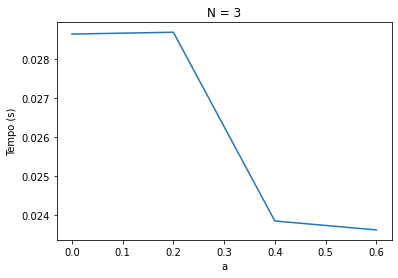


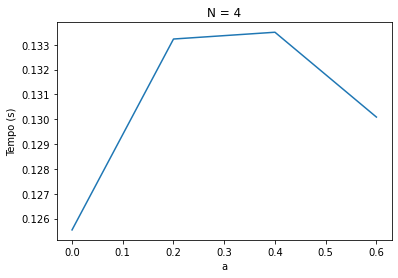


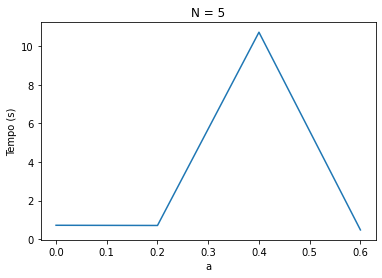

No caso de N = 3 reparamos que, uma vez que a solução é obtida de forma relativamente rápida, não se verifica uma grande discrepância entre o tempo de execução para cada $a \in \{0,0.2,0.4,0.6\}$.  


Considerando o N = 4 começamos a verificar que a fração de casas preechidas influencia a complexidade do problema, tornando-se evidente que até $a = 0.4$ o tempo de execução aumenta e a partir de $a = 0.6$ este diminui.


Para o caso do N = 5, tal como para N = 4, o tempo de execução aumenta substancialmente com $a = 0.4$ e diminui para $a = 0.6$, mas para $a = 0.2$ mantem-se perto de valor obtido para $a = 0$.

Para N = 6, uma vez que o número de variáveis é significativamente maior, o tempo de execução é gravemente afetado, pelo que se tornou inconcebível fazer a comparação entre os diferentes $a's$.